In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.utils as ku
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

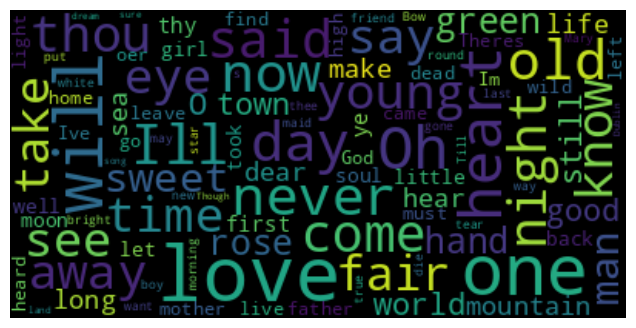

In [3]:
# Reading
data = open('/content/poem.txt', encoding="utf8").read()

# Generating WordCloud
wordcloud = WordCloud(max_font_size=50,
					max_words=100,
					background_color="black").generate(data)

# Plotting
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("WordCloud.png")
plt.show()


In [5]:
# Generating the corpus
corpus = data.lower().split("\n")
print(corpus[:10])


['stay, i said', 'to the cut flowers.', 'they bowed', 'their heads lower.', 'stay, i said to the spider,', 'who fled.', 'stay, leaf.', 'it reddened,', 'embarrassed for me and itself.', 'stay, i said to my body.']


In [6]:
# Fitting the Tokenizer on the Corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# Vocabulary count
total_words = len(tokenizer.word_index)
print("Total Words:", total_words)

Total Words: 3807


In [7]:
# Converting the text into embeddings
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]

	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
										maxlen=max_sequence_len,
										padding='pre'))
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes=total_words+1)

In [8]:
# Building a Bi-Directional LSTM Model
model = Sequential()
model.add(Embedding(total_words+1, 100,
					input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words+1/2, activation='relu',
				kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words+1, activation='softmax'))
model.compile(loss='categorical_crossentropy',
			optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           380800    
                                                                 
 bidirectional (Bidirection  (None, 15, 300)           301200    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 3807)              384507    
                                                                 
 dense_1 (Dense)             (None, 3808)              14500864  
                                                        

In [9]:
history = model.fit(predictors, label, epochs=150, verbose=1)

Epoch 1/150
510/510 [==============================] - 24s 31ms/step - loss: 6.9400 - accuracy: 0.0621
Epoch 2/150
510/510 [==============================] - 7s 13ms/step - loss: 6.5438 - accuracy: 0.0628
Epoch 3/150
510/510 [==============================] - 6s 13ms/step - loss: 6.3791 - accuracy: 0.0643
Epoch 4/150
510/510 [==============================] - 6s 12ms/step - loss: 6.2544 - accuracy: 0.0688
Epoch 5/150
510/510 [==============================] - 7s 13ms/step - loss: 6.1640 - accuracy: 0.0749
Epoch 6/150
510/510 [==============================] - 6s 12ms/step - loss: 6.0870 - accuracy: 0.0795
Epoch 7/150
510/510 [==============================] - 7s 13ms/step - loss: 5.9986 - accuracy: 0.0833
Epoch 8/150
510/510 [==============================] - 6s 11ms/step - loss: 5.8852 - accuracy: 0.0942
Epoch 9/150
510/510 [==============================] - 6s 12ms/step - loss: 5.7758 - accuracy: 0.1042
Epoch 10/150
510/510 [==============================] - 6s 12ms/step - loss: 5.67

In [10]:
seed_text = "The world"
next_words = 25
ouptut_text = ""

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences(
		[token_list], maxlen=max_sequence_len-1,
	padding='pre')
	predicted = np.argmax(model.predict(token_list,
										verbose=0), axis=-1)
	output_word = ""

	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break

	seed_text += " " + output_word

print(seed_text)

The world seems bright and gay as i spent up in dublin union going to antrim street so night all a tune o night down by the
